In [1]:
import maintsim
import matplotlib.pyplot as plt

plt.rc('font', **{'size':18})

## Serial three-machine line with no degradation

In [2]:
three_machine_line = maintsim.SimulationParameters(
    process_times = [3, 1, 2],
    sim_time = 100)

scenario1 = maintsim.Scenario(three_machine_line)

scenario1.simulate()


               processing time units produced        TH MTTF MTTR  \
Machine 0                    3             32  0.323232  NaN  NaN   
Machine 1                    1             32  0.323232  NaN  NaN   
Machine 2                    2             31  0.313131  NaN  NaN   
System     bottleneck time = 3             31      0.31  NaN  NaN   

          availability  avg queue time  
Machine 0            1             NaN  
Machine 1            1             NaN  
Machine 2            1             NaN  
System               1             NaN  
Simulation completed in 1.30s


In [3]:
scenario1.production_data.head()

,Machine 0 production,Machine 1 production,Machine 2 production,Machine 0 TH,Machine 1 TH,Machine 2 TH,M0 running,M1 running,M2 running,Ideal production,M0 processing,M1 processing,M2 processing
0,0,0,0,NaN,NaN,NaN,1,1,1,0.000000,1,0,0
1,0,0,0,0.000000,0.00,0.0,1,1,1,0.333333,1,0,0
2,0,0,0,0.000000,0.00,0.0,1,1,1,0.666667,1,0,0
3,1,0,0,0.333333,0.00,0.0,1,1,1,1.000000,1,1,0
4,1,1,0,0.250000,0.25,0.0,1,1,1,1.333333,1,0,1


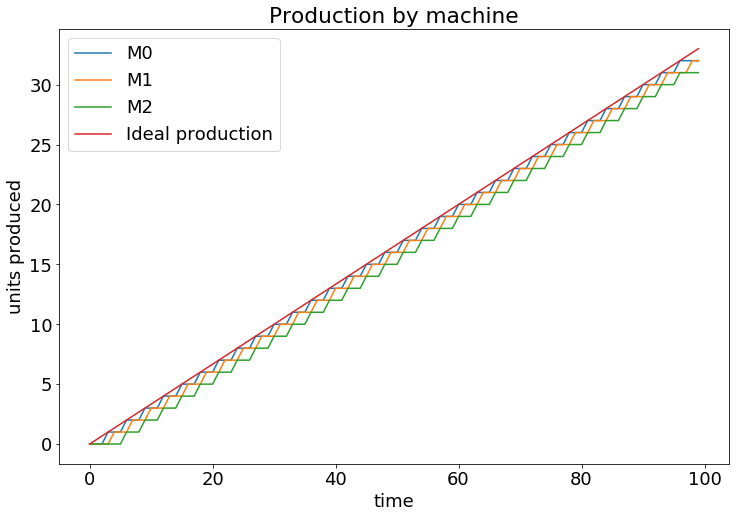

In [4]:
plt.figure(figsize=(12,8))
for m in range(scenario1.p.NUM_MACHINES):
    plt.plot(scenario1.production_data.iloc[:,m], label='M{}'.format(m))
plt.plot(scenario1.production_data['Ideal production'])
plt.title('Production by machine')
plt.xlabel('time')
plt.ylabel('units produced')
plt.legend()
plt.show()

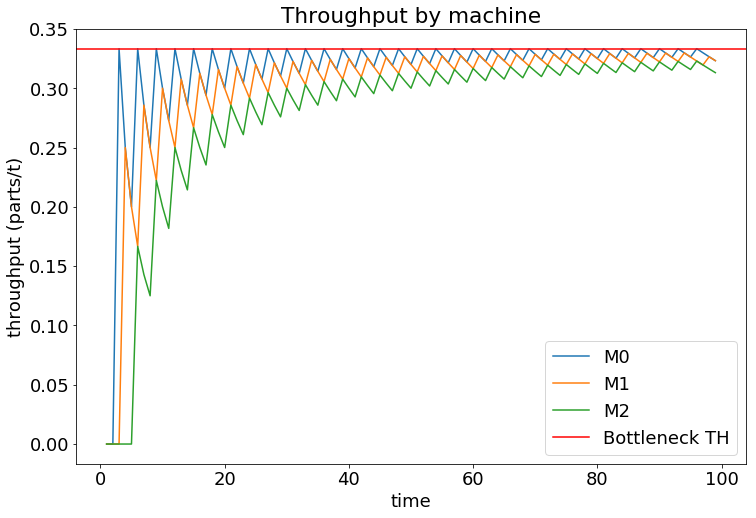

In [5]:
plt.figure(figsize=(12,8))
for m in range(scenario1.p.NUM_MACHINES):
    plt.plot(scenario1.production_data.iloc[:,3+m], label='M{}'.format(m))
plt.axhline(1/max(scenario1.p.PROCESS_TIMES), c='red', label='Bottleneck TH')
plt.title('Throughput by machine')
plt.xlabel('time')
plt.ylabel('throughput (parts/t)')
plt.legend()
plt.show()

## Five-machine line with corrective maintenance

In [25]:
five_machine_line = maintsim.SimulationParameters(
    process_times = [4, 2, 3, 5, 2],
    sim_time = 100,

    buffer_sizes = [2]*5,
    
    degradation = [0.85]*5,
    
    maint_policy = 'CM',
    repair_dist = 'uniform',
    repair_params = [5, 15],
    queue_discipline = 'fifo',
    maint_capacity = 1,
    
    cm_cost = 100,
    
    warmup_time = 0)

scenario2 = maintsim.Scenario(five_machine_line)

scenario2.simulate()


               processing time units produced         TH  MTTF     MTTR  \
Machine 0                    4             18   0.181818    56       17   
Machine 1                    2             15   0.151515    84      NaN   
Machine 2                    3             13   0.131313  42.5       10   
Machine 3                    5             10    0.10101    56       14   
Machine 4                    2              8  0.0808081    69      NaN   
System     bottleneck time = 5              8       0.08  61.5  13.6667   

          availability  avg queue time  
Machine 0         0.82            0.00  
Machine 1            1             NaN  
Machine 2         0.89            0.00  
Machine 3         0.85           17.00  
Machine 4            1           18.00  
System           0.912            8.75  
Simulation completed in 0.84s


In [20]:
scenario2.production_data.loc[0:10,:]

,Machine 0 production,Machine 1 production,Machine 2 production,Machine 3 production,Machine 4 production,Machine 0 TH,Machine 1 TH,Machine 2 TH,Machine 3 TH,Machine 4 TH,...,M1 running,M2 running,M3 running,M4 running,Ideal production,M0 processing,M1 processing,M2 processing,M3 processing,M4 processing
0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,...,1,1,1,1,0.0,1,0,0,0,0
1,0,0,0,0,0,0.000000,0.000000,0.000000,0.0,0.0,...,1,1,1,1,0.2,1,0,0,0,0
2,0,0,0,0,0,0.000000,0.000000,0.000000,0.0,0.0,...,1,1,1,1,0.4,1,0,0,0,0
3,0,0,0,0,0,0.000000,0.000000,0.000000,0.0,0.0,...,1,1,1,1,0.6,1,0,0,0,0
4,1,0,0,0,0,0.250000,0.000000,0.000000,0.0,0.0,...,1,1,1,1,0.8,1,1,0,0,0
5,1,0,0,0,0,0.200000,0.000000,0.000000,0.0,0.0,...,1,1,1,1,1.0,1,1,0,0,0
6,1,1,0,0,0,0.166667,0.166667,0.000000,0.0,0.0,...,1,1,1,1,1.2,1,0,1,0,0
7,1,1,0,0,0,0.142857,0.142857,0.000000,0.0,0.0,...,1,1,1,1,1.4,1,0,1,0,0
8,2,1,0,0,0,0.250000,0.125000,0.000000,0.0,0.0,...,1,1,1,1,1.6,1,1,1,0,0
9,2,1,1,0,0,0.222222,0.111111,0.111111,0.0,0.0,...,1,1,1,1,1.8,1,1,0,1,0


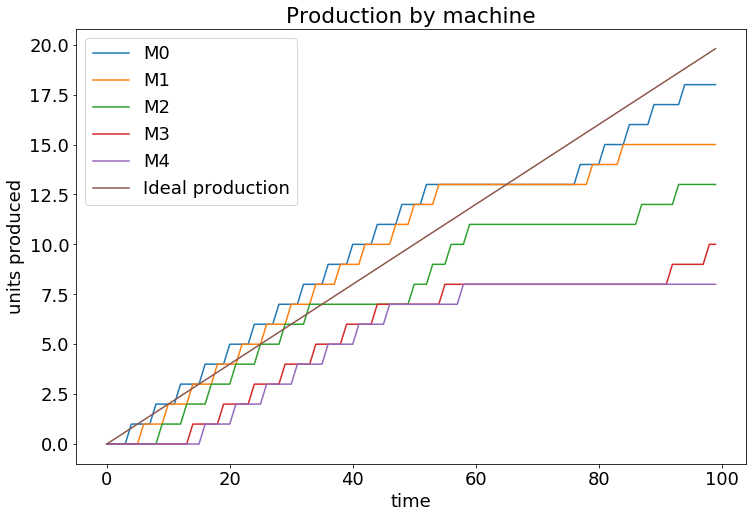

In [26]:
plt.figure(figsize=(12,8))
for m in range(scenario2.p.NUM_MACHINES):
    plt.plot(scenario2.production_data.iloc[0:,m], label='M{}'.format(m))
plt.plot(scenario2.production_data['Ideal production'][0:])
plt.title('Production by machine')
plt.xlabel('time')
plt.ylabel('units produced')
plt.legend()
plt.show()

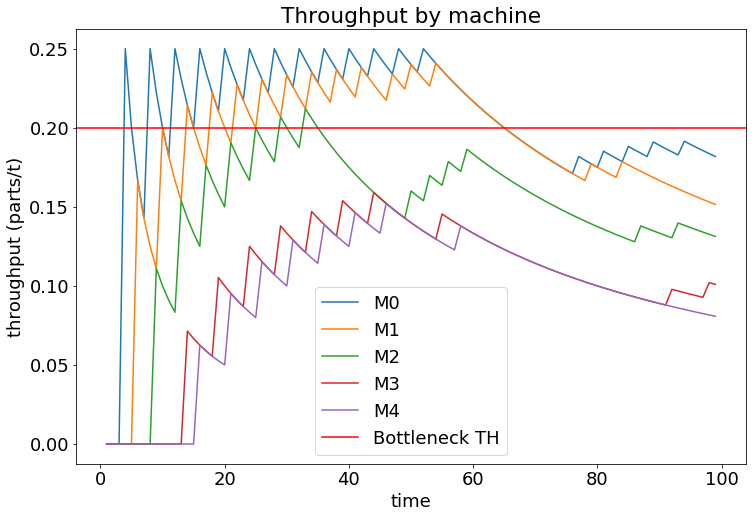

In [28]:
plt.figure(figsize=(12,8))
for m in range(scenario2.p.NUM_MACHINES):
    plt.plot(scenario2.production_data.iloc[0:,5+m], label='M{}'.format(m))
plt.axhline(1/max(scenario2.p.PROCESS_TIMES), c='red', label='Bottleneck TH')
plt.title('Throughput by machine')
plt.xlabel('time')
plt.ylabel('throughput (parts/t)')
plt.legend()
plt.show()

In [29]:
scenario2.maintenance_data[scenario2.maintenance_data['time'] >= 0]

,time,machine,type,activity,TTF/TTR
0,37,2,CM,failure,37
1,37,2,CM,repair start,0
2,47,2,CM,repair end,10
3,56,0,CM,failure,56
4,56,3,CM,failure,56
5,56,0,CM,repair start,0
6,69,4,CM,failure,69
7,73,0,CM,repair end,17
8,73,3,CM,repair start,17
9,84,1,CM,failure,84


In [30]:
scenario2.iterate_simulation(10, verbose=True)

       average cost
PM         0.000000
CM       290.000000
LP         0.000000
Total    290.000000
SE        22.135944


## Five-machine line with condition-based maintenance

In [17]:
five_machine_line_cbm = maintsim.SimulationParameters(
    process_times = [4, 2, 3, 5, 2],
    sim_time = 100,   
    sim_title = 'More Complex Test Case',

    buffer_sizes = [2]*5,
    
    degradation = [0.9]*5,
    
    maint_policy = 'CBM',
    repair_dist = 'uniform',
    repair_params = [5, 15],
    queue_discipline = 'fifo',
    maint_capacity = 1,
    
    cm_cost = 100,
    
    warmup_time = 0)

scenario3 = maintsim.Scenario(five_machine_line_cbm, 
                              thresholds=[8, 7, 7, 8, 6])

scenario3.simulate()


               processing time units produced        TH MTTF MTTR  \
Machine 0                    4             24  0.242424  NaN  NaN   
Machine 1                    2             23  0.232323  NaN    5   
Machine 2                    3             19  0.191919  NaN    5   
Machine 3                    5             15  0.151515  NaN    7   
Machine 4                    2             14  0.141414  NaN    5   
System     bottleneck time = 5             14      0.14  NaN  5.5   

          availability  avg queue time  
Machine 0            1             NaN  
Machine 1         0.94             0.0  
Machine 2         0.94             0.0  
Machine 3         0.92             0.0  
Machine 4         0.94             0.0  
System           0.948             0.0  
Simulation completed in 1.00s


In [31]:
scenario3.maintenance_data

,time,machine,type,activity,TTF/TTR
0,42,4,CBM,scheduled,42
1,42,4,CBM,repair start,0
2,47,4,CBM,repair end,5
3,52,1,CBM,scheduled,52
4,52,1,CBM,repair start,0
5,57,1,CBM,repair end,5
6,63,2,CBM,scheduled,63
7,63,2,CBM,repair start,0
8,68,2,CBM,repair end,5
9,68,3,CBM,scheduled,68
